## Overview

This notebook aims to automate several geoprocessing workflows. The NDVI and EVI data used was extracted using STAC_sentinel_download_ndvi_evi.ipynb. This notebook uses STAC abilities to manipulate cloud geospatial data and, if needed, export desired outputs as local geotiffs.

## Automated Operations:

- **Workflow 1**:  Create a single raster image representing the mean of the input NDVI rasters, excluding no-data values from the calculation.

- **Workflow 2**: Reclassify each input EVI raster using kmeans. The number of clusters was determined by the Silhouette Method. The relabelling was done using mean value of the each cluster to mitigate extreme values and outliers. The final output is an averaged EVI from all the relabelled tiffs generated.

#### The data is from Pedrogão Grande (Leiria, Portugal) where major wildfires occurred in the October of 2017. These images are all pre event

# Setting Up Working Environment

* Select suitable python kernel before installing .yml file
* Create the anaconda environment using an already configured yaml file (takes around around 5 minutes to create the environment)

In [1]:
!conda env export > geospatial_environment.yaml

In [ ]:
!conda env create -f geospatial_environment.yml

# Packages installed inside anaconda environment

* Cell is commented due to redundancy when creating a conda environment with .yaml

In [ ]:
# import sys
# !{sys.executable} -m pip install uv 
# !uv pip install geospatial

# Import installed and custom packages

In [1]:
import numpy as np

# Geospatial Data Visualizuation
import matplotlib.pyplot as plt
from matplotlib_scalebar.scalebar import ScaleBar

import glob
import os
import sys
import rioxarray

current_dir = os.getcwd()
aux_functions_path = os.path.join(r"C:\Users\fuji_\Desktop\PyGEO\Geospatial-Ops")
sys.path.append(aux_functions_path)
import aux_functions as af
import importlib
importlib.reload(af)

<module 'aux_functions' from 'C:\\Users\\fuji_\\Desktop\\PyGEO\\Geospatial-Ops\\aux_functions.py'>

# Workflow 1

## Methodology used:

- **1. Raster Stacking:**

  - List all the TIFF files in the input folder.
Use the af.stack_rasters function on the list of TIFF files. This function calculates the mean of all input rasters while clipping them with an input vector file (in this case, a .shp file). If necessary, an additional chunk parameter was added to prevent memory errors during clipping operations.

- **2. Plot Generation:**

  - Generate the mean plot using Matplotlib. Ensure that the x and y labels are appropriately named, depending on whether the data is in a Geographic Coordinate System or a Projected Coordinate System.

- **3. No Data Value Assignment:**

  - Carefully constructed all functions and outputs to assign the correct no data value.

## Find all TIFF files in a directory and create a list

In [2]:
index_path = r"D:\Geospatial_Pessoal\STAC_py"

raster_dir = fr"{index_path}\ndvi_output"

input_tiffs = glob.glob(os.path.join(raster_dir, '*.tiff')) + glob.glob(os.path.join(raster_dir, '*.tif'))

total_tiffs = len(input_tiffs)
print(f"Total number of TIFF files: {total_tiffs}")

input_tiffs

Total number of TIFF files: 11


['D:\\Geospatial_Pessoal\\STAC_py\\ndvi_output\\NDVI_20170105_4326.tiff',
 'D:\\Geospatial_Pessoal\\STAC_py\\ndvi_output\\NDVI_20170108_4326.tiff',
 'D:\\Geospatial_Pessoal\\STAC_py\\ndvi_output\\NDVI_20170115_4326.tiff',
 'D:\\Geospatial_Pessoal\\STAC_py\\ndvi_output\\NDVI_20170118_4326.tiff',
 'D:\\Geospatial_Pessoal\\STAC_py\\ndvi_output\\NDVI_20170125_4326.tiff',
 'D:\\Geospatial_Pessoal\\STAC_py\\ndvi_output\\NDVI_20170309_4326.tiff',
 'D:\\Geospatial_Pessoal\\STAC_py\\ndvi_output\\NDVI_20170316_4326.tiff',
 'D:\\Geospatial_Pessoal\\STAC_py\\ndvi_output\\NDVI_20170405_4326.tiff',
 'D:\\Geospatial_Pessoal\\STAC_py\\ndvi_output\\NDVI_20170702_4326.tiff',
 'D:\\Geospatial_Pessoal\\STAC_py\\ndvi_output\\NDVI_20170712_4326.tiff',
 'D:\\Geospatial_Pessoal\\STAC_py\\ndvi_output\\NDVI_20170724_4326.tiff']

In [4]:
tiff_files = input_tiffs
output_tiff = fr"{raster_dir}pedrogao_grande_mean_ndvi_2017.tiff"
aoi_shapefile = r"D:\Geospatial_Pessoal\STAC_py\pedrogao_grande_area_ardida_2017.geojson"

## Calculate Average (mean) of all the four input tiffs

In [5]:
af.stack_rasters(tiff_files, output_tiff, aoi_shapefile, chunk_size=None, operation='mean')

Processing multiple raster files D:\Geospatial_Pessoal\STAC_py\ndvi_output\NDVI_20170105_4326.tiff
Processing multiple raster files D:\Geospatial_Pessoal\STAC_py\ndvi_output\NDVI_20170108_4326.tiff
Processing multiple raster files D:\Geospatial_Pessoal\STAC_py\ndvi_output\NDVI_20170115_4326.tiff
Processing multiple raster files D:\Geospatial_Pessoal\STAC_py\ndvi_output\NDVI_20170118_4326.tiff
Processing multiple raster files D:\Geospatial_Pessoal\STAC_py\ndvi_output\NDVI_20170125_4326.tiff
Processing multiple raster files D:\Geospatial_Pessoal\STAC_py\ndvi_output\NDVI_20170309_4326.tiff
Processing multiple raster files D:\Geospatial_Pessoal\STAC_py\ndvi_output\NDVI_20170316_4326.tiff
Processing multiple raster files D:\Geospatial_Pessoal\STAC_py\ndvi_output\NDVI_20170405_4326.tiff
Processing multiple raster files D:\Geospatial_Pessoal\STAC_py\ndvi_output\NDVI_20170702_4326.tiff
Processing multiple raster files D:\Geospatial_Pessoal\STAC_py\ndvi_output\NDVI_20170712_4326.tiff
Processing

## Plot mean NDVI

In [6]:
def add_north_arrow(ax):

  # Position of the north arrow
  py = 0.8 * ax.figure.bbox.height
  px = 0.7 * ax.figure.bbox.width

  # Draw an arrow with a text "N" above it using annotation
  ax.annotate("N", xy=(px-10, py+5), fontsize=20, xycoords="figure pixels")
  ax.annotate("",  xy=(px,  py), xytext=(px, py-30),xycoords="figure pixels",
          arrowprops=dict(arrowstyle="-|>", facecolor="black"))

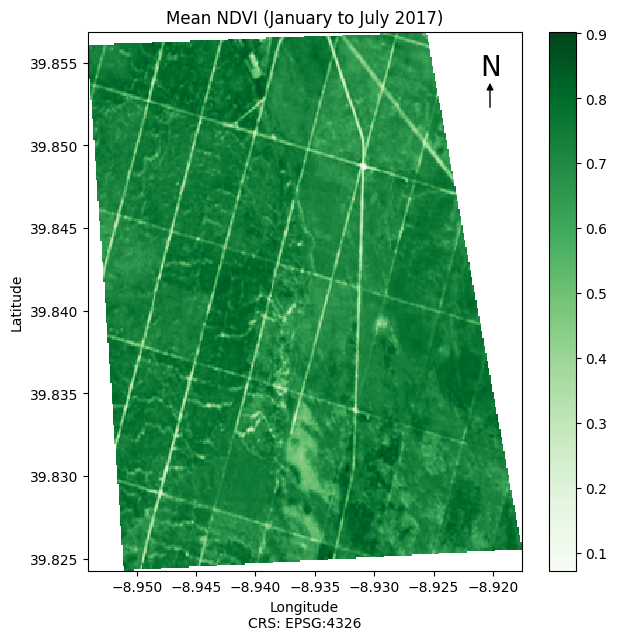

In [9]:
ndvi_raster = rioxarray.open_rasterio(output_tiff)

ndvi_mask = ndvi_raster.where(ndvi_raster != ndvi_raster.rio.nodata)

fig, ax = plt.subplots(figsize=(7, 7), dpi=100)
ndvi_mask.plot(cmap='Greens')
plt.title('Mean NDVI (January to July 2017)')
plt.xlabel(f'Longitude\nCRS: {ndvi_raster.rio.crs}')
plt.ylabel('Latitude')

add_north_arrow(ax)
plt.show()

# Workflow 2

## Methodology used:

- **1. Processing TIFF Files:**

  - List all the TIFF files in the input folder and apply the af.process_directory function to this list. Unlike Task 1, each individual TIFF file is processed separately rather than being stacked together in an initial stage.

- **2. Silhouette Scoring:**

  - The process_raster_for_silhouette is called to define the ideal clustering number before applying k-means.

- **3. K-Means Clustering:**

  - The process_raster function is called to apply K-means clustering on each TIFF file.
  - The cluster labels are then relabeled using the relabel_clusters function. K-means assigns labels arbitrarily, which may not have specific meanings. This function calculates the value range of the created labels and assigns them based on their mean. Labels in ascending order correspond to increasing EVI classes.

- **4. Raster Stacking:**

  - After clustering and relabeling, the af.stack_rasters function is applied.
  
- **5. Rounding Values:**

  - To round the float values to integers, the convert_raster_to_integers function is used.

- **6. No Data Value Assignment:**

  - All functions and outputs are carefully constructed to assign the correct no data value.

## Find all TIFF files in a directory and create a list

In [11]:
raster_dir = fr"{index_path}\evi_output"

input_tiffs = glob.glob(os.path.join(raster_dir, '*.tiff')) + glob.glob(os.path.join(raster_dir, '*.tif'))

total_tiffs = len(input_tiffs)
print(f"Total number of TIFF files: {total_tiffs}")

input_tiffs

Total number of TIFF files: 11


['D:\\Geospatial_Pessoal\\STAC_py\\evi_output\\EVI_20170105_4326.tiff',
 'D:\\Geospatial_Pessoal\\STAC_py\\evi_output\\EVI_20170108_4326.tiff',
 'D:\\Geospatial_Pessoal\\STAC_py\\evi_output\\EVI_20170115_4326.tiff',
 'D:\\Geospatial_Pessoal\\STAC_py\\evi_output\\EVI_20170118_4326.tiff',
 'D:\\Geospatial_Pessoal\\STAC_py\\evi_output\\EVI_20170125_4326.tiff',
 'D:\\Geospatial_Pessoal\\STAC_py\\evi_output\\EVI_20170309_4326.tiff',
 'D:\\Geospatial_Pessoal\\STAC_py\\evi_output\\EVI_20170316_4326.tiff',
 'D:\\Geospatial_Pessoal\\STAC_py\\evi_output\\EVI_20170405_4326.tiff',
 'D:\\Geospatial_Pessoal\\STAC_py\\evi_output\\EVI_20170702_4326.tiff',
 'D:\\Geospatial_Pessoal\\STAC_py\\evi_output\\EVI_20170712_4326.tiff',
 'D:\\Geospatial_Pessoal\\STAC_py\\evi_output\\EVI_20170724_4326.tiff']

# Define Ideal Cluster number using silhouette score

* Ideally, apply k-means with the optimal count for every raster data, but due to time and memory restraints, I used one value as an example.
* Normalization should also be applied before distance-based clustering algorithms but this data only has one input variable. NDVI and EVI are themselves already -1 to 1 scaled indexes, so this step may potentially be skipped.
* Standardization can also be an option before clustering.

Silhouette score for 2 clusters: 0.669
Silhouette score for 3 clusters: 0.503
Silhouette score for 4 clusters: 0.524
Silhouette score for 5 clusters: 0.517
Silhouette score for 6 clusters: 0.519
Silhouette score for 7 clusters: 0.522


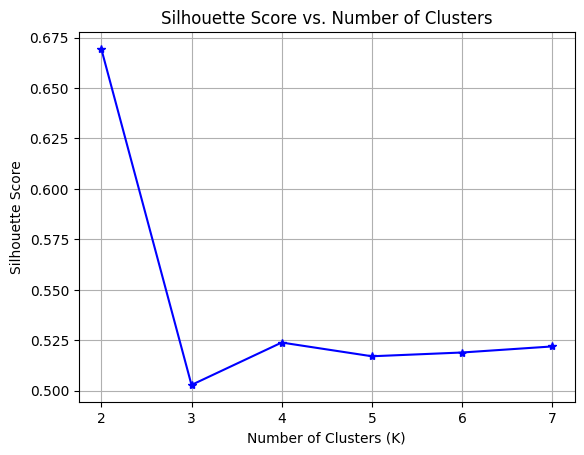

In [12]:
# range(2,X) will output 2 to X-1 clusters

k_range=range(2, 8)

af.process_raster_for_silhouette(fr"{index_path}\evi_output\EVI_20170724_4326.tiff", k_range=k_range)

# Apply k means clustering

* Redefine labels using mean value to mitigate extreme values or outliers.
* Apply n_clusters using the silhouette score plot.

In [13]:
input_directory = fr"{index_path}\evi_output"
output_directory = fr"{index_path}\evi_output\output_silhouette"

if not os.path.exists(output_directory):
    os.makedirs(output_directory)
else:
    print(f"{output_directory} already exists!")
    
af.process_directory(input_directory, output_directory, n_clusters=2)

Processing D:\Geospatial_Pessoal\STAC_py\evi_output\EVI_20170105_4326.tiff
Cluster value ranges:
Cluster 1: Min = 0.0564924815153278, Max = 0.30222946389540195, Count = 40490
Cluster 2: Min = 0.30223004694835676, Max = 0.6993207691571798, Count = 51901
Means for each cluster before relabeling:
Old Cluster 1: Mean = 0.17936097270536489, Min = 0.0564924815153278, Max = 0.30222946389540195, Count = 40490
Old Cluster 2: Mean = 0.5007754080527682, Min = 0.30223004694835676, Max = 0.6993207691571798, Count = 51901

Cluster value ranges and reordering based on means:
Old Cluster 1: Min = 0.0564924815153278, Max = 0.30222946389540195, Count = 40490 -> New Cluster 1
Old Cluster 2: Min = 0.30223004694835676, Max = 0.6993207691571798, Count = 51901 -> New Cluster 2
Relabeling output saved at D:\Geospatial_Pessoal\STAC_py\evi_output\output_silhouette\EVI_20170105_4326_relabeled.tiff
Processing D:\Geospatial_Pessoal\STAC_py\evi_output\EVI_20170108_4326.tiff
Cluster value ranges:
Cluster 1: Min = 0.

## Calculate Average (mean) of all the relabelled rasters

In [14]:
raster_dir = output_directory

input_tiffs = glob.glob(os.path.join(raster_dir, '*.tiff')) + glob.glob(os.path.join(raster_dir, '*.tif'))

total_tiffs = len(input_tiffs)
print(f"Total number of TIFF files: {total_tiffs}")

filename_mean = "pedrogao_evi_kmeans_relabeled_mean_silhouette.tiff"
output_tiff_mean = os.path.join(output_directory, filename_mean)

input_tiffs

Total number of TIFF files: 11


['D:\\Geospatial_Pessoal\\STAC_py\\evi_output\\output_silhouette\\EVI_20170105_4326_relabeled.tiff',
 'D:\\Geospatial_Pessoal\\STAC_py\\evi_output\\output_silhouette\\EVI_20170108_4326_relabeled.tiff',
 'D:\\Geospatial_Pessoal\\STAC_py\\evi_output\\output_silhouette\\EVI_20170115_4326_relabeled.tiff',
 'D:\\Geospatial_Pessoal\\STAC_py\\evi_output\\output_silhouette\\EVI_20170118_4326_relabeled.tiff',
 'D:\\Geospatial_Pessoal\\STAC_py\\evi_output\\output_silhouette\\EVI_20170125_4326_relabeled.tiff',
 'D:\\Geospatial_Pessoal\\STAC_py\\evi_output\\output_silhouette\\EVI_20170309_4326_relabeled.tiff',
 'D:\\Geospatial_Pessoal\\STAC_py\\evi_output\\output_silhouette\\EVI_20170316_4326_relabeled.tiff',
 'D:\\Geospatial_Pessoal\\STAC_py\\evi_output\\output_silhouette\\EVI_20170405_4326_relabeled.tiff',
 'D:\\Geospatial_Pessoal\\STAC_py\\evi_output\\output_silhouette\\EVI_20170702_4326_relabeled.tiff',
 'D:\\Geospatial_Pessoal\\STAC_py\\evi_output\\output_silhouette\\EVI_20170712_4326_relabel

In [15]:
af.stack_rasters(input_tiffs, output_tiff_mean, aoi_shapefile=None, chunk_size=None, operation='mean')

Processing multiple raster files D:\Geospatial_Pessoal\STAC_py\evi_output\output_silhouette\EVI_20170105_4326_relabeled.tiff
Processing multiple raster files D:\Geospatial_Pessoal\STAC_py\evi_output\output_silhouette\EVI_20170108_4326_relabeled.tiff
Processing multiple raster files D:\Geospatial_Pessoal\STAC_py\evi_output\output_silhouette\EVI_20170115_4326_relabeled.tiff
Processing multiple raster files D:\Geospatial_Pessoal\STAC_py\evi_output\output_silhouette\EVI_20170118_4326_relabeled.tiff
Processing multiple raster files D:\Geospatial_Pessoal\STAC_py\evi_output\output_silhouette\EVI_20170125_4326_relabeled.tiff
Processing multiple raster files D:\Geospatial_Pessoal\STAC_py\evi_output\output_silhouette\EVI_20170309_4326_relabeled.tiff
Processing multiple raster files D:\Geospatial_Pessoal\STAC_py\evi_output\output_silhouette\EVI_20170316_4326_relabeled.tiff
Processing multiple raster files D:\Geospatial_Pessoal\STAC_py\evi_output\output_silhouette\EVI_20170405_4326_relabeled.tiff


## Convert raster float values to integer

In [16]:
filename_mean_int = "pedrogao_evi_kmeans_relabeled_mean_integer.tiff"

output_tiff_mean_integer = os.path.join(output_directory, filename_mean_int)

af.convert_raster_to_integers(output_tiff_mean, output_tiff_mean_integer)

Raster with integer dataype saved at D:\Geospatial_Pessoal\STAC_py\evi_output\output_silhouette\pedrogao_evi_kmeans_relabeled_mean_integer.tiff


## Plot kmean averaged integer EVI

* Reproject to EPSG:32629 (UTM projected CRS) so that the scalebar showcases meters dimensions.

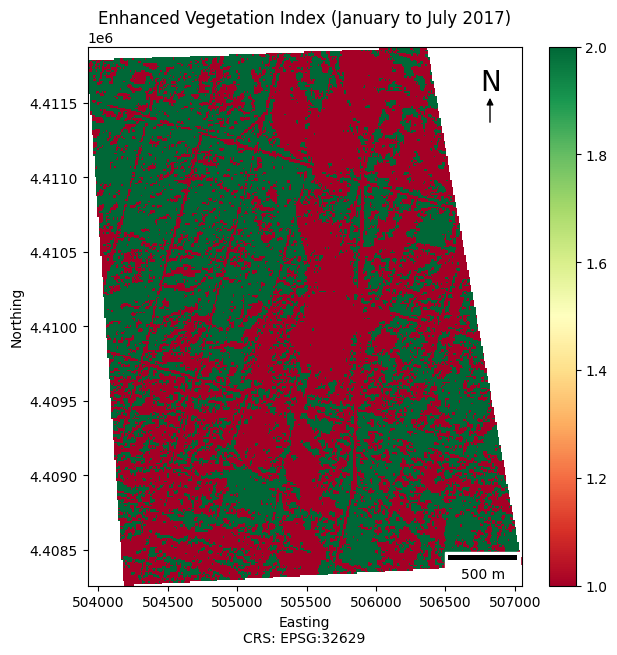

In [17]:
evi_raster = rioxarray.open_rasterio(output_tiff_mean_integer)
evi_raster = evi_raster.rio.reproject("EPSG:32629", inplace=True)

evi_masked = evi_raster.where(evi_raster != evi_raster.rio.nodata)

fig, ax = plt.subplots(figsize=(7, 7), dpi=100)
evi_masked.plot(cmap='RdYlGn' , vmin=np.nanmin(evi_masked), vmax=np.nanmax(evi_masked))
plt.title('Enhanced Vegetation Index (January to July 2017)')
plt.xlabel(f'Easting\nCRS: {evi_raster.rio.crs}')
plt.ylabel('Northing')

add_north_arrow(ax)

scalebar = ScaleBar(1, location='lower right')  # Set scale bar length as needed (in data units)
ax.add_artist(scalebar)

plt.show()